# Project -5

Project Description:-
In this project, I will be applying Machine Learning approaches(and eventually comparing them) for classifying whether a person is suffering from heart disease or not, using one of the most used dataset — Cleveland Heart Disease dataset.


In [6]:
#Importing library to load the data
import pandas as pd

In [25]:
#Loading the csv file into dataframe format in df
df = pd.read_csv("Heart_Disease.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [27]:
#Adding columns name to the dataset
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [8]:
#Checking shape of the data
df.shape

(303, 14)

In [9]:
# This will print the names of all columns.
df.columns  

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see that there are 303 rows in df.shape and here in this observation we can see that 303 not-null value present
so there is no missing value present in the dataset.

In [11]:
#To show the total count of missing values present in each column in the dataset

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#This will give the datanames of all columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
#Checking the description of dataset for better understanding the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observation:-

1. The count of variables is 303 across all columns so i can say that there is no missing value present in the dataset.
2. the mean is higher in some column than median and in some columns median is high than mean so by this observation i can say
   that the skewnees is present in the dataset and the data is not normally distributed.    
3. the minimum age in the dataset is 29 and maximum age is 77.
4. the difference between min and max is high in dataset so range is high.
5. the difference between 75% and maximum is high so outliers are present in the dataset.

In [16]:
#importing Some library to visualize the dataset and finding some observation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

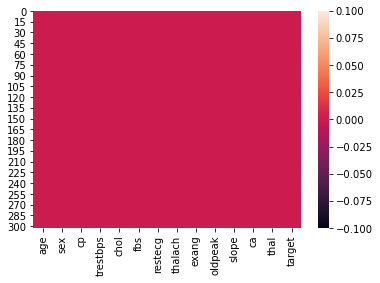

In [17]:
#Checking missing values by plotting heatmap
sns.heatmap(df.isnull())

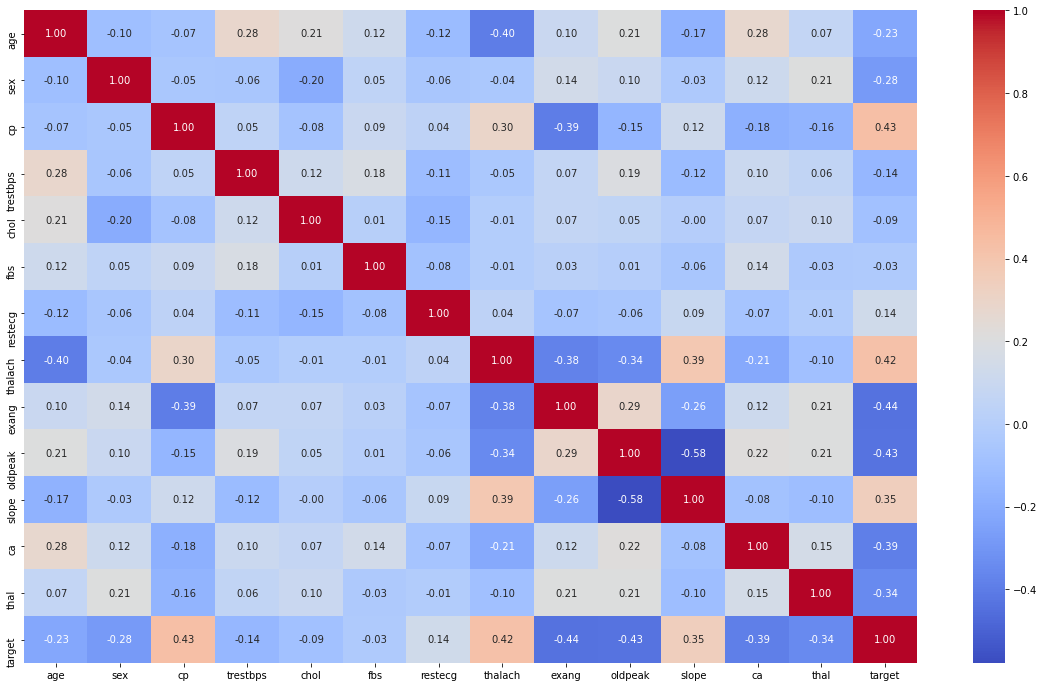

In [18]:
#Checking How data features are corelated with each other:-
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

Observation:-    
1.As per observation we can see that the some columns are good corelated with our target variable.
2.Columns like slope,thalach,cp are very high and positively corelated with the target variable.
3.columns like age,sex,exang,oldpeak are very negatively corelated with the target.
4.Highest positive corelated column:- cp
5.Highest -ve corelated column :- oldpeak

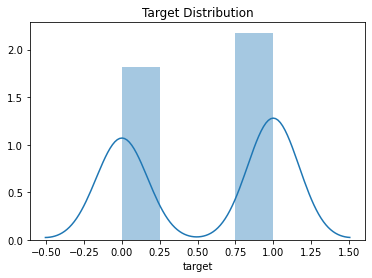

In [19]:
#Checking Distribution of target variable
#Checking how my target variable distributed
sns.distplot(df['target'])
plt.title("Target Distribution")
plt.show()

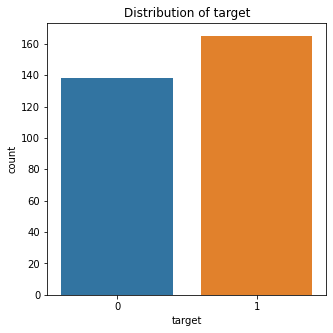

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(df['target'])
plt.title("Distribution of target")
plt.show()